In [15]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
poke_df=pd.read_csv('pokemon.csv', sep=',')
poke_df.head()   #una stampa solo per conferma

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [18]:
combat_df=pd.read_csv('combats.partial.csv', sep=',')
combat_df.head()   #una stampa solo per conferma

,Winner,First_pokemon,Second_pokemon
0,650,650,579
1,151,151,558
2,340,340,631
3,139,688,139
4,132,365,132


Lanciando un occhio ai tipi non risulta nulla di problematico, un rapido check è sempre buono e giunto

In [20]:
poke_df.describe()
poke_df.info()
combat_df.describe()
combat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Winner          40000 non-null  int64
 1   First_pokemon   40000 non-null  i

#### Unisco i dataset in modo da avere le stats di ogni pokeom per ogni combattimento

In [21]:
combat_df['WinnerTag'] = np.where((combat_df['Winner'] == combat_df['First_pokemon']), 1, 2)

combat_df = combat_df.join(poke_df.add_suffix('_1').set_index('#_1'), on='First_pokemon')
combat_df = combat_df.join(poke_df.add_suffix('_2').set_index('#_2'), on='Second_pokemon')

combat_df.head()

,Winner,First_pokemon,Second_pokemon,WinnerTag,Name_1,Type 1_1,Type 2_1,HP_1,Attack_1,Defense_1,...,Type 1_2,Type 2_2,HP_2,Attack_2,Defense_2,Sp. Atk_2,Sp. Def_2,Speed_2,Generation_2,Legendary_2
0,650,650,579,1,Karrablast,Bug,NaN,50,75,45,...,Normal,Flying,50,55,50,36,30,43,5,False
1,151,151,558,1,Omastar,Rock,Water,70,60,125,...,Fire,NaN,65,63,45,45,45,45,5,False
2,340,340,631,1,Mega Manectric,Electric,NaN,70,75,80,...,Poison,NaN,80,95,82,60,82,75,5,False
3,139,688,139,2,Bouffalant,Normal,NaN,95,110,95,...,Normal,NaN,75,100,95,40,70,110,1,False
4,132,365,132,2,Swablu,Normal,Flying,45,40,60,...,Psychic,Fairy,40,45,65,100,120,90,1,False


#### Ora mi ricavo la percentuale di vittoria per ogni pokemon in modo da poter studiare la correlazione tra questo valore e le proprietà del pokemon

In [24]:
combat_copy=pd.read_csv('combats.partial.csv', sep=',')

Pkmn_fights_1 = combat_copy.groupby('Second_pokemon').count()
Pkmn_fights_2 = combat_copy.groupby('First_pokemon').count()
numberOfWins = combat_copy.groupby('Winner').count().sort_index()

#mi tiro su un nuvo df
numberOfWins['Total Fights'] = Pkmn_fights_1.Winner + Pkmn_fights_2.Winner
numberOfWins['Win%']= numberOfWins.First_pokemon/numberOfWins['Total Fights']
poke_df = pd.merge(poke_df, numberOfWins.drop(columns=['First_pokemon','Second_pokemon']), right_index = True, left_on='#')


In [25]:
poke_df.sort_values(by='Win%', ascending=False).head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Fights_x,Win%_x,Total Fights_y,Win%_y,Total Fights,Win%
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,110,0.981818,110,0.981818,110,0.981818
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,90,0.977778,90,0.977778,90,0.977778
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,104,0.971154,104,0.971154,104,0.971154
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,109,0.963303,109,0.963303,109,0.963303
262,263,Raikou,Electric,NaN,90,85,75,115,100,115,2,True,80,0.962500,80,0.962500,80,0.962500
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,101,0.960396,101,0.960396,101,0.960396
678,679,Accelgor,Bug,NaN,80,70,40,100,60,145,5,False,99,0.959596,99,0.959596,99,0.959596
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,95,0.957895,95,0.957895,95,0.957895
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,113,0.955752,113,0.955752,113,0.955752
248,249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,2,False,107,0.953271,107,0.953271,107,0.953271


In [27]:
poke_df.sort_values(by='Win%', ascending=False).tail(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Fights_x,Win%_x,Total Fights_y,Win%_y,Total Fights,Win%
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,91,0.054945,91,0.054945,91,0.054945
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,111,0.054054,111,0.054054,111,0.054054
398,399,Spheal,Ice,Water,70,40,50,55,50,25,3,False,102,0.049020,102,0.049020,102,0.049020
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,107,0.046729,107,0.046729,107,0.046729
175,176,Sentret,Normal,NaN,35,46,34,35,45,20,2,False,91,0.043956,91,0.043956,91,0.043956
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,103,0.038835,103,0.038835,103,0.038835
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,94,0.031915,94,0.031915,94,0.031915
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,98,0.030612,98,0.030612,98,0.030612
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,105,0.028571,105,0.028571,105,0.028571
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,96,0.020833,96,0.020833,96,0.020833


## Qual'è la chiave per vincere un combattimento?
#### Per ogni statistica vale la stessa regola: più ce n'è e meglio è (e tutte sulla stessa scala), e allora il segreto della vittora potrebbe essere avere un valore di overall alto
#### Vado a ricavare la somma delle statistiche per ogni pokemon per poi studiarne il comportamento


In [37]:
poke_df['Total_stats'] = poke_df['HP'] + poke_df['Attack'] + poke_df['Defense'] + poke_df['Sp. Atk'] + poke_df['Sp. Def'] + poke_df['Speed']
print(poke_df.iloc[:, [1, -1]].head())

            Name  Total_stats
0      Bulbasaur          318
1        Ivysaur          405
2       Venusaur          525
3  Mega Venusaur          625
4     Charmander          309


E ora passiamo a vedere se un overall maggiore di statistiche corrisponda ad un amuento della probabilità di vincere

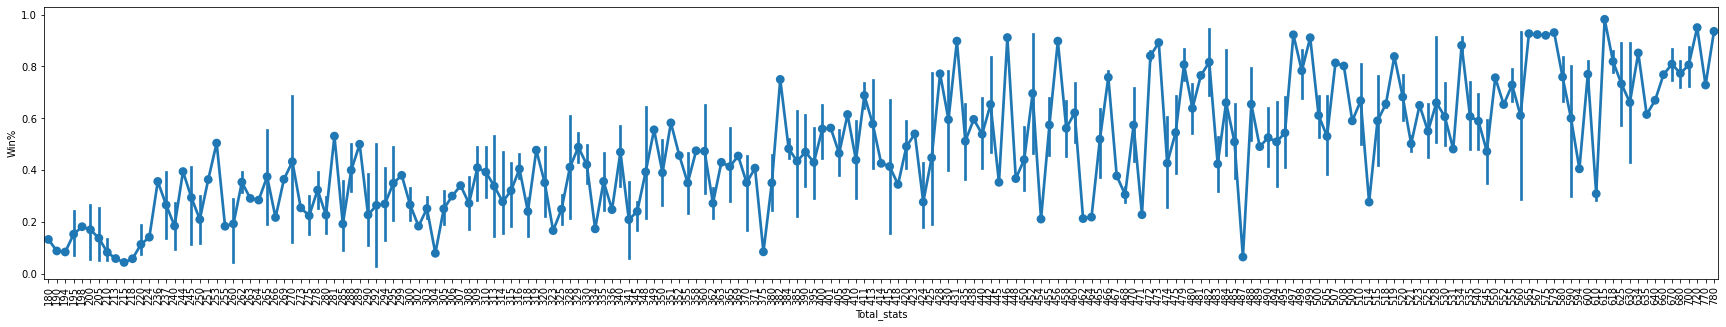

In [48]:
plt.figure(figsize = (30,5))
sns.pointplot(x=poke_df['Total_stats'], y=poke_df['Win%'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

## Leggendario è meglio?
#### Vediamo se il segreto per la vittoria di un pokemon leggendario è legata solo al fatto che si trova sulla copertina del gioco, o se invece sono le sue statistiche a giocare la partita

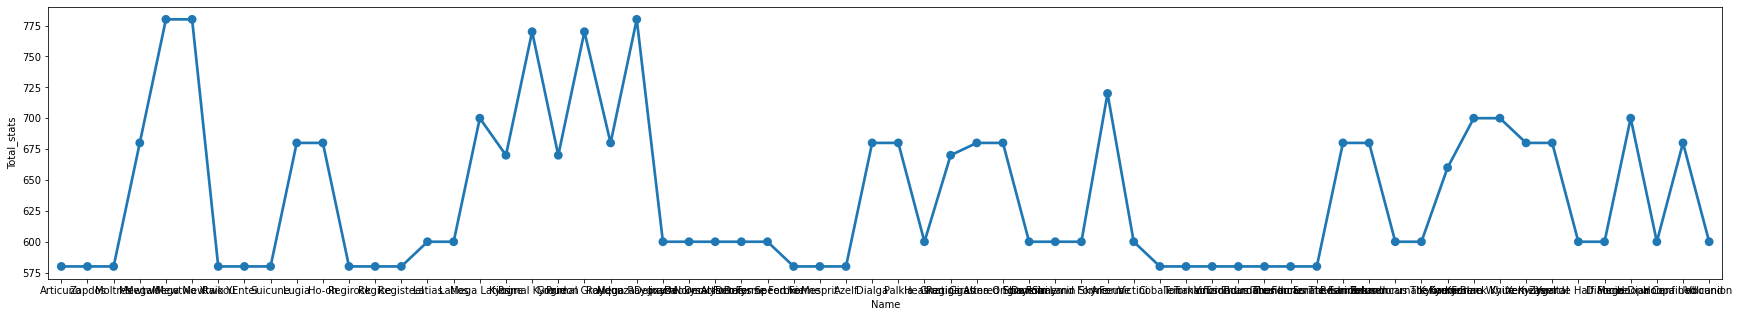

In [62]:

plt.figure(figsize = (30,5))
plt.setp(labels, rotation=90) #perchè non giri?    TODO

legend_df = poke_df.loc[poke_df['Legendary'] == True]
sns.pointplot(x=legend_df['Name'], y=legend_df['Total_stats'])

plt.show()

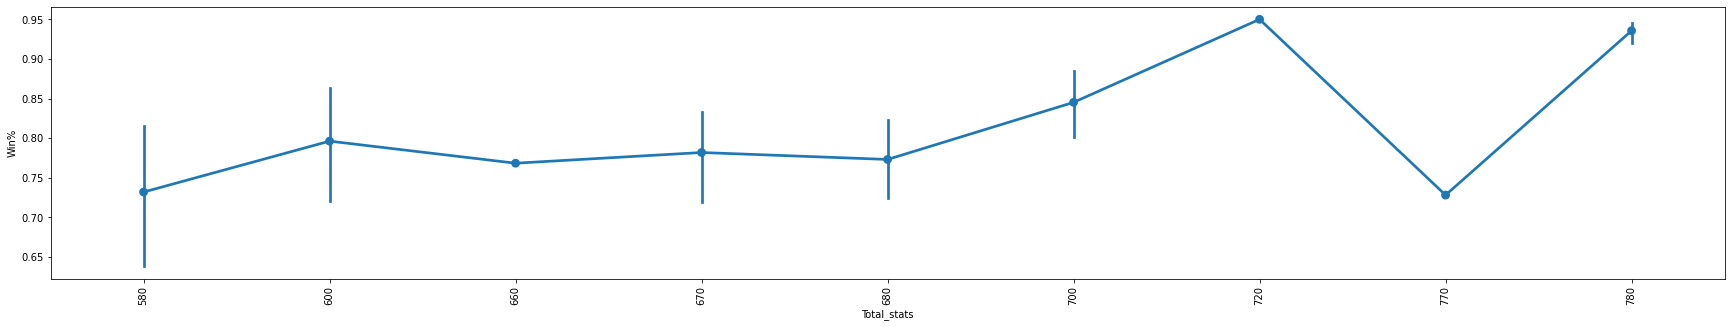

In [63]:
plt.figure(figsize = (30,5))
sns.pointplot(x=legend_df['Total_stats'], y=legend_df['Win%'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

## Ah i giovani d'oggi...
#### Come sono legate le statistiche con il cambio delle generazioni? Essere un pokémon "giovane" comporta un vantaggio?

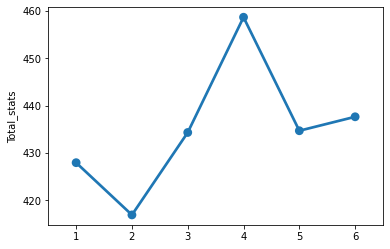

In [64]:
group_df = poke_df.drop(['#', 'Legendary'], axis=1)
pokemon_groups = group_df.groupby('Generation')
pokemon_groups_mean = pokemon_groups.mean()

sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Total_stats'])
plt.show()

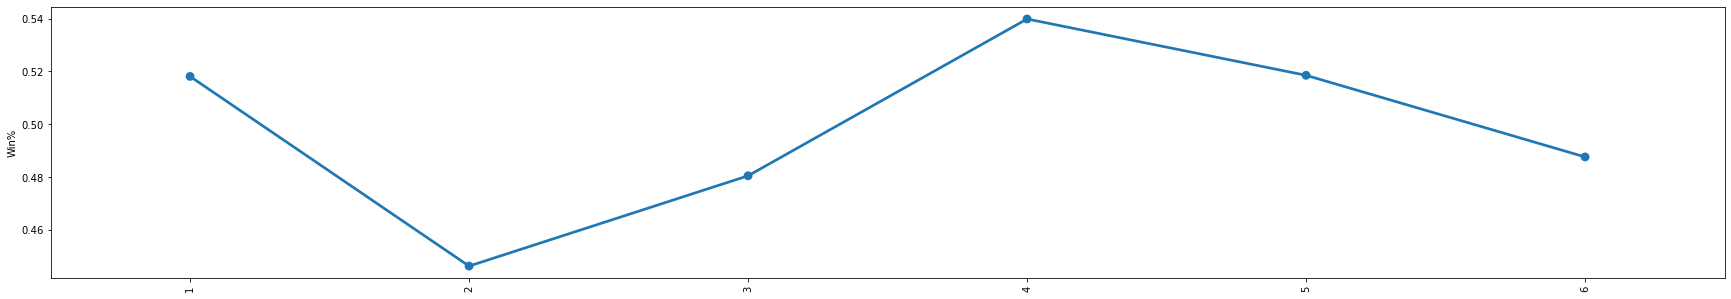

In [66]:
plt.figure(figsize = (30,5))
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['Win%'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

Effettivamete essere un pokemon di 4a presenta un buon vantaggio nella vittoria, ma sempre perchè la a generazione sembra avere stats migliori

### Da quel che abbiamo visto, l'overall è una buona stima ma presenta molta incertezza, nonostante le curve della Win% vadano "in salita", presentano dei cali che mi lasciano un grosso dubbio...

## "Non puoi giudicare un pesce rosso da come scala un albero"
#### L'overall sembra una buona stima del valore di un pokemon, ma è troppo generale, il segreto della vittoria potrebbe essere un confronto particolare fra statistiche oppure una determinata combinazione di queste ultime. Come cambia il discorso precedente se si effettua uno studio valore per valore?

<AxesSubplot:xlabel='Win%', ylabel='Speed'>

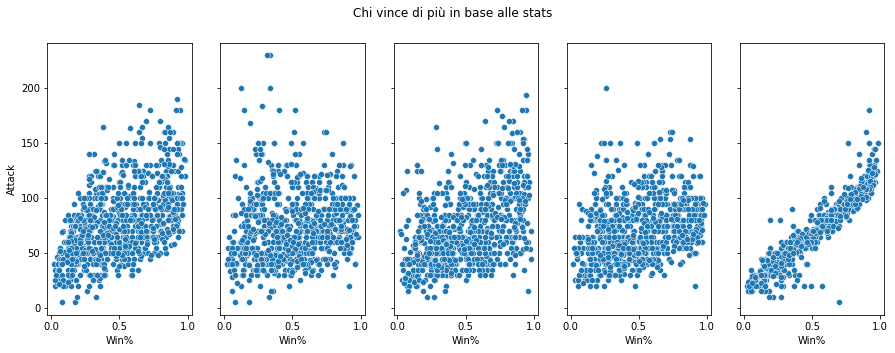

In [68]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('Chi vince di più in base alle stats')

sns.scatterplot(ax=axes[0], x="Win%", y="Attack", data=poke_df)
sns.scatterplot(ax=axes[1], x="Win%", y="Defense", data=poke_df)
sns.scatterplot(ax=axes[2], x="Win%", y="Sp. Atk", data=poke_df)
sns.scatterplot(ax=axes[3], x="Win%", y="Sp. Def", data=poke_df)
sns.scatterplot(ax=axes[4], x="Win%", y="Speed", data=poke_df)

### Ci siamo posti la domanda giusta!!
#### A quanto pare, non è il totale delle statistiche che generalmente determina l'esito del combattimento. Sembra infatti che la velocità giochi un ruolo decsamente importante

<AxesSubplot:>

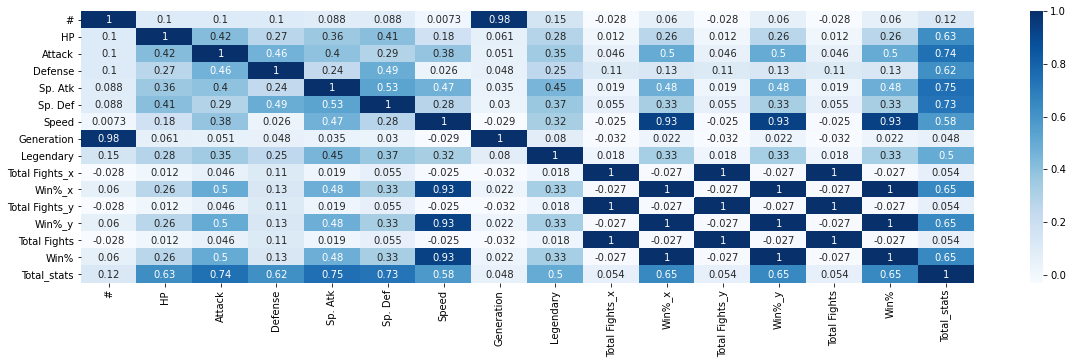

In [71]:
corr = poke_df.corr()
plt.figure(figsize = (20,5))
sns.heatmap(corr, cmap="Blues", annot=True)

Effettivamente chi attacca poer primo ha un ovvio vantaggio, se si compiesse un colpo critico o se si ussasse una mossa superefficace si può vincere una battaglia così

## Conclusioni:
L'idea alla base dello studio è stata la seguente:
- Il tipo del pokemon inficia poco sull esito della battaglia poichè il tipo non vincola il tipo della mossa che puo essere usata (un tipo erba puo lanciare mosse di tipo acqua e vincere contro un tipo fuoco)
- I danni inflitti e ricevuti in una batytaglia pokemon dipendono dunque dalle statistiche di un pokemon (capacità di infliggere e incassare danni)
- Il fatto di essere leggendario non comporta alcun vantaggio, ma essere leggendario coincide nel piu dei casi ad avere stats alte
- Far parte di una certa generazione non comporta alcun bantaggio, ma le generazioni hanno distribuzioni diverse delle stats, e dunque pokemon di 4a sono avvantaggiati poichè generlamente hanno stats piu alte
- l overall delle statistiche è correlato all esito della battaglia, ma sembra che sia la stats velocità in particolare a giocare un ruolo fondamentale

### Procedo ad eseguire lo split per il file di trai e di test

In [74]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(pd.read_csv('combats.partial.csv', sep=','), test_size=0.23, random_state=42) #Prendo il file iniziale perchè su df ci ho lavorato fino ad ora

train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)